In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
file_path = "/content/drive/MyDrive/Patrimoine/03_Suivi patrimoine boursier/data/20241206_comptes action opérations.xlsx"

In [3]:
dfOperations = pd.read_excel(file_path, sheet_name='opérations')

In [4]:
dfOperations ['Date de valeur'] = pd.to_datetime(dfOperations ['Date de valeur'])

In [5]:
dfOperations

,Support,Symbole,ISIN,Montant net en euros,Valeur de la part en euros,Nombre de parts,Frais de gestion,Date de valeur,Type opération,Compte,ID compte,Côté
0,FCPR Eurazeo Private Value Europe 3 (FR0013301...,NaN,FR0013301553,1008.00,118.010000,8.541650,NaN,2022-04-08,Versement libre complémentaire,Assurance Vie Linxea Spirit 2 Benoit,11.17.1.1,Non
1,FCPR Ardian Multi stratégies (FR0013486446),NaN,FR0013486446,1008.00,105.280000,9.574470,NaN,2022-04-08,Versement libre complémentaire,Assurance Vie Linxea Spirit 2 Benoit,11.17.1.1,Non
2,FCPR Eurazeo Private Value Europe 3 (FR0013301...,NaN,FR0013301553,-1.28,119.680000,-0.010680,NaN,2022-06-10,Frais de gestion sur UC,Assurance Vie Linxea Spirit 2 Benoit,11.17.1.1,Non
3,FCPR Ardian Multi stratégies (FR0013486446),NaN,FR0013486446,-1.25,104.730000,-0.011970,NaN,2022-06-10,Frais de gestion sur UC,Assurance Vie Linxea Spirit 2 Benoit,11.17.1.1,Non
4,FCPR Eurazeo Private Value Europe 3 (FR0013301...,NaN,FR0013301553,-1.30,122.240000,-0.010660,NaN,2022-09-09,Frais de gestion sur UC,Assurance Vie Linxea Spirit 2 Benoit,11.17.1.1,Non
...,...,...,...,...,...,...,...,...,...,...,...,...
113,Core S&P 500 USD (Acc),SXR8.DE,IE00B5BMR087,200.00,607.341545,0.329304,1.0,2025-02-27,Versement libre complémentaire,CTO Trade Republic Benoit,19.25.0.1,Oui
114,Core S&P 500 USD (Acc),SXR8.DE,IE00B5BMR087,50.00,NaN,0.082971,NaN,2025-03-03,Versement libre complémentaire,CTO Trade Republic Benoit,19.25.0.1,Oui
115,Core S&P 500 USD (Acc),SXR8.DE,IE00B5BMR087,1.00,NaN,0.001675,NaN,2025-03-03,Coupon,CTO Trade Republic Benoit,19.25.0.1,Oui
116,Amundi Nasdaq-100 II UCITS ETF Acc,LYMS.DE,NaN,-999.00,NaN,-13.157894,1.0,2025-03-06,Désinvestissement,CTO Trade Republic Benoit,19.25.0.1,Oui


# Récupération des valeurs de marché

In [ ]:
ListeSymbole = dfOperations.groupby("Symbole", dropna=True)["Date de valeur"].min().reset_index()

In [ ]:
date_end = '2025-03-03'

In [ ]:
ListeSymbole = ListeSymbole.sort_values(by="Date de valeur", ascending=True)

In [ ]:
ListeSymbole

,Symbole,Date de valeur
0,500.PA,2023-08-02
1,C40.PA,2023-08-02
9,MWRD.PA,2023-08-02
15,UST.PA,2023-08-02
12,QDVE.DE,2024-01-14
2,CAC.PA,2024-03-01
5,EWLD.PA,2024-03-01
8,MSE.PA,2024-03-01
10,PE500.PA,2024-03-01
11,PUST.PA,2024-03-01


In [ ]:
dfPerformance = yf.download(ListeSymbole["Symbole"][0], start=ListeSymbole["Date de valeur"][0], end=date_end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
dfPerformance = dfPerformance[["Close"]]

In [ ]:
# Réinitialisation de l'index
dfPerformance = dfPerformance.reset_index()

# Ajout d'une colonne avec le ticker (nom du DataFrame ou symbole spécifique)
dfPerformance['Ticker'] = ListeSymbole["Symbole"][0]

dfPerformance.columns = ['Date', 'Close', 'Ticker']


In [ ]:
for i, (index, row) in enumerate(ListeSymbole.iterrows()):
    if i == 0:  # Ignore la première ligne
        continue

    dfPerforTemp = yf.download(row["Symbole"], start=row["Date de valeur"], end=date_end)
    if dfPerforTemp.empty:
        continue

    dfPerforTemp = dfPerforTemp[["Close"]]

    # Fusion des DataFrames sur l'index (date)
    dfPerforTemp = dfPerforTemp.reset_index()
    dfPerforTemp['Ticker'] = row["Symbole"]
    dfPerforTemp.columns = ['Date', 'Close', 'Ticker']

    # Ajouter les nouvelles données à la suite de df
    dfPerformance = pd.concat([dfPerformance, dfPerforTemp], ignore_index=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
dfPerformance['Nombre de part'] = 0
dfPerformance['Montant investi euro'] = 0
dfPerformance['Valeur marché'] = 0

for index, row in dfPerformance.iterrows():
  date_limite = row['Date']
  date_limite = pd.Timestamp(date_limite).tz_localize(None)
  filtered_df = dfOperations.loc[(dfOperations['Date de valeur'] <= date_limite) & (dfOperations['Symbole'] == row['Ticker'])]
  sommeeuro = filtered_df[filtered_df['Type opération'] == 'Versement libre complémentaire' ]['Montant net en euros'].sum()
  sommepart = filtered_df['Nombre de parts'].sum()
  valeurmarche = row['Close'] * sommepart
  dfPerformance.at[index, 'Nombre de part'] = sommepart
  dfPerformance.at[index, 'Montant investi euro'] = sommeeuro
  dfPerformance.at[index, 'Valeur marché'] = valeurmarche

<ipython-input-14-8bfe5f9f9fa0>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.25861' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfPerformance.at[index, 'Nombre de part'] = sommepart
<ipython-input-14-8bfe5f9f9fa0>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '499.51970357025147' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfPerformance.at[index, 'Valeur marché'] = valeurmarche
<ipython-input-14-8bfe5f9f9fa0>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '12192.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfPerformance.at[index, 'Montant investi euro'] = sommeeuro


In [ ]:
dfPerformance

,Date,Close,Ticker,Nombre de part,Montant investi euro,Valeur marché
0,2023-08-02,79.813202,500.PA,6.258610,500.000000,499.519704
1,2023-08-03,79.389603,500.PA,6.258610,500.000000,496.868561
2,2023-08-04,79.086700,500.PA,6.258610,500.000000,494.972814
3,2023-08-07,78.894997,500.PA,6.258610,500.000000,493.773015
4,2023-08-08,78.779999,500.PA,6.258610,500.000000,493.053288
...,...,...,...,...,...,...
3625,2025-02-24,1303.400024,L8I7.DE,0.377073,499.998798,491.476957
3626,2025-02-25,1230.199951,L8I7.DE,0.377073,499.998798,463.875186
3627,2025-02-26,1271.000000,L8I7.DE,0.377073,499.998798,479.259783
3628,2025-02-27,1249.199951,L8I7.DE,0.377073,499.998798,471.039573


In [ ]:
dfValeurTotal = dfPerformance.groupby('Date')[['Valeur marché', 'Montant investi euro']].sum()

In [ ]:
dfValeurTotal

,Valeur marché,Montant investi euro
Date,,
2023-08-02,899.105314,900.000000
2023-08-03,893.701355,900.000000
2023-08-04,892.635772,900.000000
2023-08-07,889.763120,900.000000
2023-08-08,887.493628,900.000000
...,...,...
2025-02-24,211748.836858,161592.088798
2025-02-25,207760.019721,161592.088798
2025-02-26,210345.030234,161592.088798


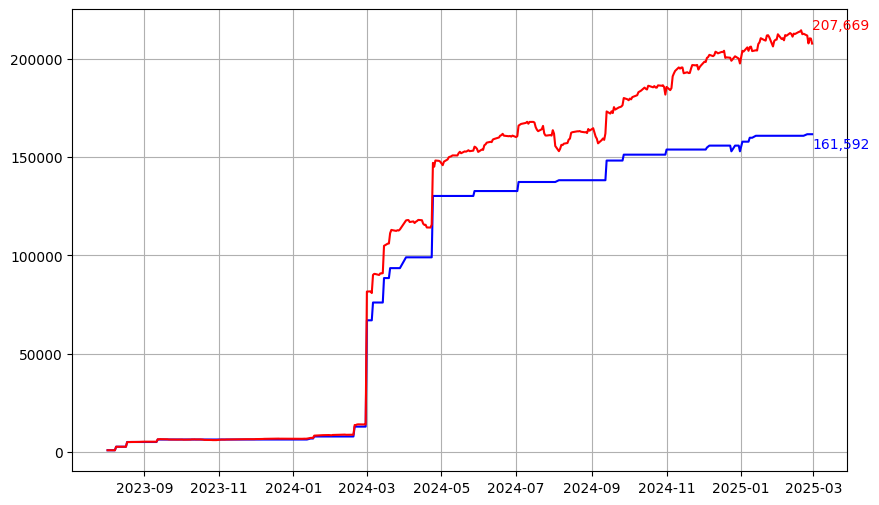

In [ ]:
# Obtenir la dernière valeur de chaque courbe
derniere_valeur_investie = dfValeurTotal['Montant investi euro'].iloc[-1]
derniere_valeur_marche = dfValeurTotal['Valeur marché'].iloc[-1]

# Tracer les courbes
plt.figure(figsize=(10, 6))  # Taille de la figure

# Tracer la première courbe
plt.plot(dfValeurTotal.index, dfValeurTotal['Montant investi euro'], label='Montant investi euro', color='blue')

# Tracer la deuxième courbe
plt.plot(dfValeurTotal.index, dfValeurTotal['Valeur marché'], label='Valeur marché', color='red')

# Ajouter une grille
plt.grid(True)

plt.annotate(f'{int(derniere_valeur_investie):,}',
             (dfValeurTotal.index[-1], derniere_valeur_investie),
             textcoords="offset points",
             xytext=(0,-10),
             ha='left',
             color='blue')

plt.annotate(f'{int(derniere_valeur_marche):,}',
             (dfValeurTotal.index[-1], derniere_valeur_marche),
             textcoords="offset points",
             xytext=(0,10),
             ha='left',
             color='red')

# Afficher le graphique
plt.show()

In [ ]:
dfPerformance.to_csv('/content/drive/MyDrive/Patrimoine/03_Suivi patrimoine boursier/Cours_Marchés.csv', index=False)

# Création base de donnée pour marché

In [10]:
from sqlalchemy import create_engine, inspect, Column, String, Integer, MetaData, Table, DateTime, Date, Float
from sqlalchemy.orm import declarative_base, sessionmaker, relationship, backref, scoped_session
from sqlalchemy import desc, and_

In [11]:
engine = create_engine('sqlite:////content/drive/MyDrive/Patrimoine/03_Suivi patrimoine boursier/data/PatrimoineBoursier.db')

In [12]:
# Définir une base pour les modèles
Base = declarative_base()

In [13]:
class ValeurMarche(Base):
    __tablename__ = 'valeur_marche'

    Date = Column(Date, primary_key=True)
    Close = Column(Float)
    Ticker = Column(String, primary_key=True)

In [14]:
# Crée la table dans la base de données
Base.metadata.create_all(engine)

In [15]:
# Créer une session
Session = sessionmaker(bind=engine)
session = Session()

In [16]:
ListeSymbole = dfOperations.groupby("Symbole", dropna=True)["Date de valeur"].min().reset_index()

## Initialisation de la table valeur de marché

In [ ]:
dfValeurMarche = yf.download(ListeSymbole["Symbole"][0], start=ListeSymbole["Date de valeur"][0], end=date_end)

NameError: name 'date_end' is not defined

In [ ]:
dfValeurMarche = dfValeurMarche[["Close"]]

In [ ]:
# Réinitialisation de l'index
dfValeurMarche = dfValeurMarche.reset_index()

# Ajout d'une colonne avec le ticker (nom du DataFrame ou symbole spécifique)
dfValeurMarche['Ticker'] = ListeSymbole["Symbole"][0]

dfValeurMarche.columns = ['Date', 'Close', 'Ticker']


In [ ]:
for i, (index, row) in enumerate(ListeSymbole.iterrows()):
    if i == 0:  # Ignore la première ligne
        continue

    dfValeurMarcheTemp = yf.download(row["Symbole"], start=row["Date de valeur"], end=date_end)
    if dfValeurMarcheTemp.empty:
        continue

    dfValeurMarcheTemp = dfValeurMarcheTemp[["Close"]]

    # Fusion des DataFrames sur l'index (date)
    dfValeurMarcheTemp = dfValeurMarcheTemp.reset_index()
    dfValeurMarcheTemp['Ticker'] = row["Symbole"]
    dfValeurMarcheTemp.columns = ['Date', 'Close', 'Ticker']

    # Ajouter les nouvelles données à la suite de df
    dfValeurMarche = pd.concat([dfValeurMarche, dfValeurMarcheTemp], ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:

# Insérer les données
for index, row in dfValeurMarche.iterrows():
    record = ValeurMache(Date=row['Date'], Close=row['Close'], Ticker=row['Ticker'])
    session.add(record)

# Valider les transactions
session.commit()

## Extraction des dernières valeurs de marché

In [17]:
def get_most_recent_date(ticker):
    result = (session.query(ValeurMarche.Date)
                      .filter_by(Ticker=ticker)
                      .order_by(desc(ValeurMarche.Date))
                      .first())
    return result.Date if result else None

In [18]:
ListeSymbole['Date DB'] = ListeSymbole['Symbole'].apply(get_most_recent_date)

In [19]:
ListeSymbole

,Symbole,Date de valeur,Date DB
0,500.PA,2023-08-02,2025-03-06
1,C40.PA,2023-08-02,2025-03-06
2,CAC.PA,2024-03-01,2025-03-06
3,CACC.PA,2024-11-01,2025-03-06
4,EUNL.DE,2025-01-13,2025-03-06
5,EWLD.PA,2024-03-01,2025-03-06
6,L8I7.DE,2025-02-24,2025-03-06
7,LYMS.DE,2024-12-05,2025-03-06
8,MSE.PA,2024-03-01,2025-03-06
9,MWRD.PA,2023-08-02,2025-03-06


In [20]:
# Obtenir la date et l'heure actuelles
now = datetime.now()

# Extraire uniquement la date
today_date = now.date()


In [21]:
for index, row in ListeSymbole.iterrows():
    # Déterminer la date de début
    start_date = row["Date DB"] if pd.notna(row["Date DB"]) else row["Date de valeur"]
    start_date = pd.to_datetime(start_date, errors="coerce")  # Convertir en date

    # Télécharger les données de marché pour le symbole donné
    dfValeurMarcheTemp = yf.download(row["Symbole"], start=start_date, end=today_date)

    if dfValeurMarcheTemp.empty:
        continue

    # Sélectionner uniquement la colonne 'Close' et réinitialiser l'index
    dfValeurMarcheTemp = dfValeurMarcheTemp[["Close"]].reset_index()
    dfValeurMarcheTemp['Ticker'] = row["Symbole"]
    dfValeurMarcheTemp.columns = ['Date', 'Close', 'Ticker']

    # Insérer les données dans la base de données
    for _, data_row in dfValeurMarcheTemp.iterrows():
        stock_price = ValeurMarche(
            Date=data_row['Date'],
            Close=data_row['Close'],
            Ticker=data_row['Ticker']
        )
        session.merge(stock_price)  # Utilise merge pour éviter les doublons
    session.commit()  # Valide les insertions dans la base de données

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

# Valorisation des actifs au cours du marché

In [22]:
data = {
    'Symbole': [],
    'Date': [],
    'Close': [],
    'Nombre de parts': [],
    'Montant investi euro': [],
    'Valeur marché': []
}

for index, row in ListeSymbole.iterrows():
  resultats = session.query(ValeurMarche).filter(
      and_(
          ValeurMarche.Ticker == row['Symbole'],
          ValeurMarche.Date >= row['Date de valeur']
      )
  ).all()

  for resultat in resultats:

      data['Symbole'].append(resultat.Ticker)
      data['Date'].append(resultat.Date)
      data['Close'].append(resultat.Close)

      # Filtrer dfOperations selon les conditions spécifiées
      date_seuil_timestamp = pd.Timestamp(resultat.Date)
      filtres = (dfOperations['Date de valeur'] <= date_seuil_timestamp) & (dfOperations['Symbole'] == resultat.Ticker)
      nombre_parts = dfOperations.loc[filtres, 'Nombre de parts'].sum()
      data['Nombre de parts'].append(nombre_parts)

      data['Valeur marché'].append(nombre_parts*resultat.Close)

      filtresMontantEuro = (dfOperations['Date de valeur'] <= date_seuil_timestamp) & (dfOperations['Symbole'] == resultat.Ticker)& (dfOperations['Type opération'].isin(['Versement libre complémentaire', 'Désinvestissement']))
      sommeeuro = dfOperations.loc[filtresMontantEuro, 'Montant net en euros'].sum()
      data['Montant investi euro'].append(sommeeuro)



In [23]:
dfPerformance = pd.DataFrame(data)

In [24]:
dfPerformance.to_csv('/content/drive/MyDrive/Patrimoine/03_Suivi patrimoine boursier/data/Cours_Marchés.csv', index=False)

In [25]:
dfValeurTotal = dfPerformance.groupby('Date')[['Valeur marché', 'Montant investi euro']].sum()

In [28]:
dfValeurTotal.to_csv('/content/drive/MyDrive/Patrimoine/03_Suivi patrimoine boursier/data/ValeurMarcheJour.csv', index=True)

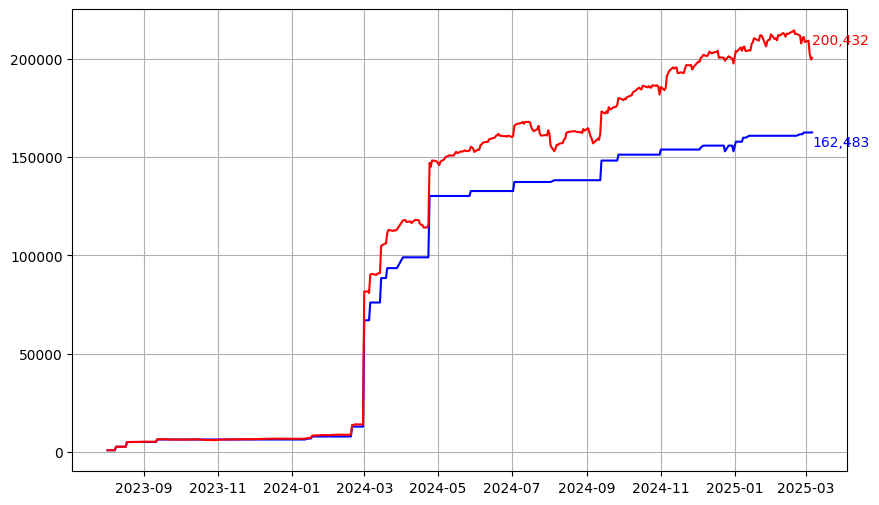

In [ ]:
# Obtenir la dernière valeur de chaque courbe
derniere_valeur_investie = dfValeurTotal['Montant investi euro'].iloc[-1]
derniere_valeur_marche = dfValeurTotal['Valeur marché'].iloc[-1]

# Tracer les courbes
plt.figure(figsize=(10, 6))  # Taille de la figure

# Tracer la première courbe
plt.plot(dfValeurTotal.index, dfValeurTotal['Montant investi euro'], label='Montant investi euro', color='blue')

# Tracer la deuxième courbe
plt.plot(dfValeurTotal.index, dfValeurTotal['Valeur marché'], label='Valeur marché', color='red')

# Ajouter une grille
plt.grid(True)

plt.annotate(f'{int(derniere_valeur_investie):,}',
             (dfValeurTotal.index[-1], derniere_valeur_investie),
             textcoords="offset points",
             xytext=(0,-10),
             ha='left',
             color='blue')

plt.annotate(f'{int(derniere_valeur_marche):,}',
             (dfValeurTotal.index[-1], derniere_valeur_marche),
             textcoords="offset points",
             xytext=(0,10),
             ha='left',
             color='red')

# Afficher le graphique
plt.show()

In [29]:

# Lire le fichier CSV dans un DataFrame
dfValeurTotal = pd.read_csv('/content/drive/MyDrive/Patrimoine/03_Suivi patrimoine boursier/data/ValeurMarcheJour.csv')

In [30]:
dfValeurTotal

,Date,Valeur marché,Montant investi euro
0,2023-08-02,899.105314,900.000000
1,2023-08-03,893.701355,900.000000
2,2023-08-04,892.635772,900.000000
3,2023-08-07,889.763120,900.000000
4,2023-08-08,887.493628,900.000000
...,...,...,...
404,2025-03-03,209131.816961,162482.768798
405,2025-03-04,202409.995535,162482.768798
406,2025-03-05,199606.558518,162482.768798
407,2025-03-06,200432.499143,162483.768798
